In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re, random

sns.set_style('darkgrid')

In [25]:
# Permanent Banner

permanent_str = ''
permanent_str += ''' 10(C), 3(W), 6(W), 10(C), 1(C), 3(W), 6(W), 9(C), 3(W), 10(W), ''' # Jeff 
permanent_str += ''' 4(W), 10(W), 5(C), 10(C), 4(C), 1(W), ''' # Jeff
permanent_str += ''' 3C, 9W, 10C, 9W, 4C, 9W, 10C, 9W, 10W, 6C, 2W, ''' # Kristen
permanent_str += ''' 10C, 2W, 10W, 9C, 7C, 2W, ''' # Kristen
permanent_str += ''' 4(C), 5(C), 2(W), 9(C), 10(W), 9(C), 10(W), ''' # Jeff


character_str = ''
character_str += ''' 6(W), 9(C), 10(W), 1(C), 4(C), 7(C), 6(C), 9(W), 8(C), 9(C), 6(C), 4(W), 4(C), 8(C), 9(W), 1(C), 8(C), 9(W), 10(C), 9(W), 9(C), 4(C), ''' # Jeff 
character_str += ''' 10(C), 9(C), 10(W), 9(C), 5(C), 10(C), 9(W), 9(C), 3(W), 4(C), 5(C), 9(C), 9(C), 10(W), 10(C), 9(W), 10(C), 6(C), 3(C), 3(C), ''' # Jeff
character_str += ''' 2W, 8W, 10W, 2C, 10C, 9C, 10C, 1C, 9W, 8C, 10W, 9C, 7C, 3C, 10C, 4C, 9C, 5C, 2C, 3C, 10W, 9C, 9W, 10C, 9C, 10C, 9C, 2C, 7C, 10C, 9C, 10C, 1C, 9W, 9C, 1C, 9W, 3C, 4W, 3C, 1C, 9C, 1C, 10W, 6C, ''' # Kristen
character_str += ''' 10C, 9C, 6C, 9C, 9W, 9C, 9C, 10W, 3C, 6C, 1W, 2C, 6W, 1C, ''' # Kristen
character_str += ''' 10(W), 9(C), 4(C), 2(C), 2(C), 6(C), 7(C), 9(W), 10(C), 6(C), 9(C), 1(C), 10(C), 4(C), 5(W), 10(C), 10(W), 9(C), 10(W), 10(C), 5(W), 9(C), 9(C), 1(C), 9(C), 10(C), 9(W), 10(C), 3(C),  8(W), ''' # Jeff
character_str += ''' 4C, 9C, 6W, 8C, 1C, 8C, 8C, 4C, 9C, 2C, 4C, 4C, 7C, 7W, 6C, 1C, ''' # Raph
character_str += ''' 9C, 8W, 9C, 2C, 6C, 9C, 9C, 1C, 9W, 10C, 5C, 4W, 9C ''' # Oonre
character_str += ''' 4(C), 9(C), 10(C), 9(W), 9(C), 3(W), 9(C), 4(C), 5(C), 4(W), 10(C), 3(C), 6(C), 10(C), 9(C), 2(C), 4(W), 10(C), 3(C), 6(C), 10(C), 10(C), 8(C), 2(C), 2(W), 10(C), 9(C), ''' # Jeff
character_str += ''' 9C, 9C, 10W, 6C, 2W, 9C, 1C, 9C, 10C, 9C, 7W, 9C,  ''' # Pat



In [48]:
# Jude
temp = '''
Slingshot
Cool Steel
Ferrous Shadow
Ferrous Shadow
Raven Bow
Magic Guide
Slingshot
Debate Club
Thrilling Tales of Dragon Slayers
Fischl (4-Star)
Slingshot
Black Tassel
Emerald Orb
Slingshot
Bloodtainted Greatsword
Harbinger of Dawn
Thrilling Tales of Dragon Slayers
Slingshot
Barbara (4-Star)
Emerald Orb
Emerald Orb
Bloodtainted Greatsword
Skyrider Sword
Debate Club
Raven Bow
Magic Guide
Skyrider Sword
Favonius Sword (4-Star)
Debate Club
Venti (5-Star)
Bloodtainted Greatsword
Sharpshooter's Oath
Cool Steel
Magic Guide
Debate Club
Raven Bow
Harbinger of Dawn
Barbara (4-Star)
Emerald Orb
Ferrous Shadow
Emerald Orb
Cool Steel
Slingshot
Thrilling Tales of Dragon Slayers
Magic Guide
Slingshot
Fischl (4-Star)
Black Tassel
Ferrous Shadow
Bloodtainted Greatsword
Magic Guide
Debate Club
Raven Bow
Thrilling Tales of Dragon Slayers
Ferrous Shadow
Skyrider Sword
Favonius Lance (4-Star)
Raven Bow
Ferrous Shadow
Skyrider Sword
Skyrider Sword
Ferrous Shadow
Cool Steel
Slingshot
Sharpshooter's Oath
Xiangling (4-Star)
Magic Guide
Raven Bow
Sharpshooter's Oath
Magic Guide
Ferrous Shadow
Debate Club
Harbinger of Dawn
Sharpshooter's Oath
Harbinger of Dawn
Xingqiu (4-Star)
Raven Bow
Black Tassel
Sharpshooter's Oath
Slingshot
Raven Bow
Ferrous Shadow
Sharpshooter's Oath
Sharpshooter's Oath
Xingqiu (4-Star)
Debate Club
Sharpshooter's Oath
Black Tassel
Raven Bow
Sharpshooter's Oath
Skyrider Sword
Emerald Orb
Magic Guide
Favonius Codex (4-Star)
Skyrider Sword
Thrilling Tales of Dragon Slayers
Sharpshooter's Oath
Cool Steel
Bloodtainted Greatsword
Raven Bow
Noelle (4-Star)
Slingshot
Thrilling Tales of Dragon Slayers
Klee (5-Star)
Cool Steel
Cool Steel
Thrilling Tales of Dragon Slayers
Sharpshooter's Oath
Ferrous Shadow
Bloodtainted Greatsword
Noelle (4-Star)
Sharpshooter's Oath
Bloodtainted Greatsword
Harbinger of Dawn
Slingshot
Bloodtainted Greatsword
Ferrous Shadow
Slingshot
Magic Guide
Dragon's Bane (4-Star)
Ferrous Shadow
Skyrider Sword
Skyrider Sword
Emerald Orb
Black Tassel
Raven Bow
Harbinger of Dawn
Cool Steel
Black Tassel
Ningguang (4-Star)
Cool Steel
Debate Club
Slingshot
Magic Guide
Black Tassel
Harbinger of Dawn
Cool Steel
Beidou (4-Star)
Cool Steel
Black Tassel
Debate Club
Emerald Orb
Emerald Orb
Debate Club
Debate Club
Bloodtainted Greatsword
The Bell (4-Star)
Ferrous Shadow
Ferrous Shadow
Skyrider Sword
Cool Steel
Emerald Orb
Ferrous Shadow
Magic Guide
Thrilling Tales of Dragon Slayers
Sharpshooter's Oath
Beidou (4-Star)
Cool Steel
Bloodtainted Greatsword
Sharpshooter's Oath
Tartaglia (5-Star)
Harbinger of Dawn
Bloodtainted Greatsword
Thrilling Tales of Dragon Slayers
'''

temp = [i for i in temp.split('\n') if i]

counter = 0
for s in temp:
    counter += 1
    res = re.findall(r'.*-Star', s)
    if res:
        character_str += f' {counter}U,'
        counter=0

In [49]:
character_str

' 6(W), 9(C), 10(W), 1(C), 4(C), 7(C), 6(C), 9(W), 8(C), 9(C), 6(C), 4(W), 4(C), 8(C), 9(W), 1(C), 8(C), 9(W), 10(C), 9(W), 9(C), 4(C),  10(C), 9(C), 10(W), 9(C), 5(C), 10(C), 9(W), 9(C), 3(W), 4(C), 5(C), 9(C), 9(C), 10(W), 10(C), 9(W), 10(C), 6(C), 3(C), 3(C),  2W, 8W, 10W, 2C, 10C, 9C, 10C, 1C, 9W, 8C, 10W, 9C, 7C, 3C, 10C, 4C, 9C, 5C, 2C, 3C, 10W, 9C, 9W, 10C, 9C, 10C, 9C, 2C, 7C, 10C, 9C, 10C, 1C, 9W, 9C, 1C, 9W, 3C, 4W, 3C, 1C, 9C, 1C, 10W, 6C,  10C, 9C, 6C, 9C, 9W, 9C, 9C, 10W, 3C, 6C, 1W, 2C, 6W, 1C,  10(W), 9(C), 4(C), 2(C), 2(C), 6(C), 7(C), 9(W), 10(C), 6(C), 9(C), 1(C), 10(C), 4(C), 5(W), 10(C), 10(W), 9(C), 10(W), 10(C), 5(W), 9(C), 9(C), 1(C), 9(C), 10(C), 9(W), 10(C), 3(C),  8(W),  4C, 9C, 6W, 8C, 1C, 8C, 8C, 4C, 9C, 2C, 4C, 4C, 7C, 7W, 6C, 1C,  9C, 8W, 9C, 2C, 6C, 9C, 9C, 1C, 9W, 10C, 5C, 4W, 9C  4(C), 9(C), 10(C), 9(W), 9(C), 3(W), 9(C), 4(C), 5(C), 4(W), 10(C), 3(C), 6(C), 10(C), 9(C), 2(C), 4(W), 10(C), 3(C), 6(C), 10(C), 10(C), 8(C), 2(C), 2(W), 10(C), 9(C),  9C, 9C

In [50]:
parser = r'(?P<pulls>\d{1,2}).*?(?P<type>[WCU]).*?,'

df_permanent = pd.DataFrame(re.findall(parser, permanent_str), columns=['pulls', 'type'])

df_character = pd.DataFrame(re.findall(parser, character_str), columns=['pulls', 'type'])
df_character['pulls'] = df_character['pulls'].astype(int)
df_character.head()

,pulls,type
0,6,W
1,9,C
2,10,W
3,1,C
4,4,C


In [51]:
df_character.shape

(233, 2)

In [52]:
df_character['type'].value_counts()

C    150
W     48
U     35
Name: type, dtype: int64

In [53]:
char_actual_avg_rate = df_character['pulls'].shape[0]/df_character['pulls'].sum()

print(f'Average 4* Pull Rate: {char_actual_avg_rate:.2%}')

Average 4* Pull Rate: 14.27%


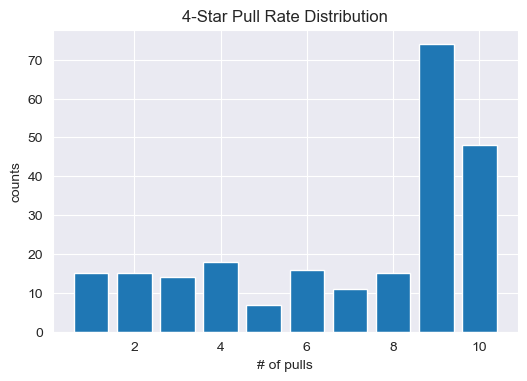

In [54]:
plt.figure(figsize=(6,4), dpi=100)
dist_character = df_character['pulls'].value_counts().sort_index()
plt.bar(dist_character.index, dist_character)
plt.xlabel('# of pulls')
plt.ylabel('counts')
plt.title('4-Star Pull Rate Distribution')
plt.show()

## Simulation

In [55]:
# n = int(1e5)
# char_banner_rate = 0.051

# random.seed(42)

# pity_counter = 0
# four_star_counter = {}

# for _ in range(n):
#     pity_counter += 1
    
#     if pity_counter != 10:
#         is_4_star = random.random() < char_banner_rate
#         if not is_4_star:
#             continue # go to next iteration
    
#     # initialize if count does not exist
#     if pity_counter not in four_star_counter:
#         four_star_counter[pity_counter] = 0
    
#     four_star_counter[pity_counter] += 1
#     pity_counter = 0

In [56]:
# df_character_simulation = pd.DataFrame(four_star_counter.items(), columns=['pulls', 'counts'])
# df_character_simulation = df_character_simulation.sort_values('pulls')


# plt.figure(figsize=(6,4), dpi=100)
# plt.bar(df_character_simulation['pulls'], df_character_simulation['counts'])
# plt.xlabel('# of pulls')
# plt.ylabel('counts')
# plt.title('4-Star Pull Rate Distribution')
# plt.show()

In [57]:
n = int(1e7)
char_banner_rate = 0.051

random.seed(42)

pity_counter = 0
four_star_counter = []

for _ in range(n):
    pity_counter += 1
#     is_4_star = random.random() < char_banner_rate
    
    if pity_counter != 10:
        is_4_star = random.random() < char_banner_rate
        if not is_4_star:
            continue # go to next iteration
    
    four_star_counter.append(pity_counter)
    pity_counter = 0

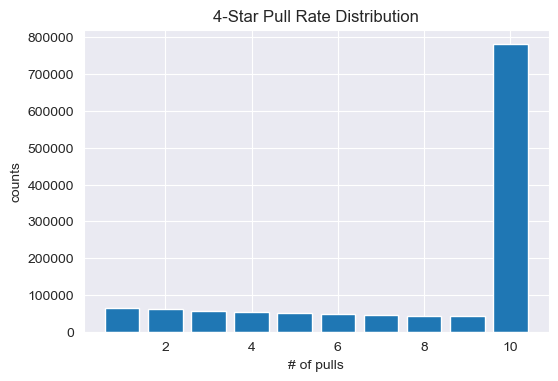

In [58]:
from collections import Counter

df_character_simulation = pd.DataFrame(Counter(four_star_counter).most_common(), columns=['pulls', 'counts'])
df_character_simulation = df_character_simulation.sort_values('pulls')


plt.figure(figsize=(6,4), dpi=100)
plt.bar(df_character_simulation['pulls'], df_character_simulation['counts'])
plt.xlabel('# of pulls')
plt.ylabel('counts')
plt.title('4-Star Pull Rate Distribution')
plt.show()

In [59]:
char_4_star_pulls = df_character_simulation['counts'].sum()
print('4* Pulls:', char_4_star_pulls)
char_sim_avg_rate = char_4_star_pulls / n
print(f'Average 4* Pull Rate: {char_sim_avg_rate:.2%}')

4* Pulls: 1251549
Average 4* Pull Rate: 12.52%


## Graph Comparison

In [60]:
true_cum_dist = dist_character.cumsum()/dist_character.sum()
true_cum_dist.values

array([0.06437768, 0.12875536, 0.1888412 , 0.26609442, 0.29613734,
       0.36480687, 0.41201717, 0.47639485, 0.79399142, 1.        ])

In [61]:
dist_character_sim = df_character_simulation.set_index('pulls')['counts']
theoretical_cum_dist = dist_character_sim.cumsum()/dist_character_sim.sum()
theoretical_cum_dist.values

array([0.05115501, 0.09940162, 0.14535667, 0.18921353, 0.23046321,
       0.26984401, 0.30688211, 0.34202576, 0.3755642 , 1.        ])

In [62]:
df_character['pulls'].sum()

1633

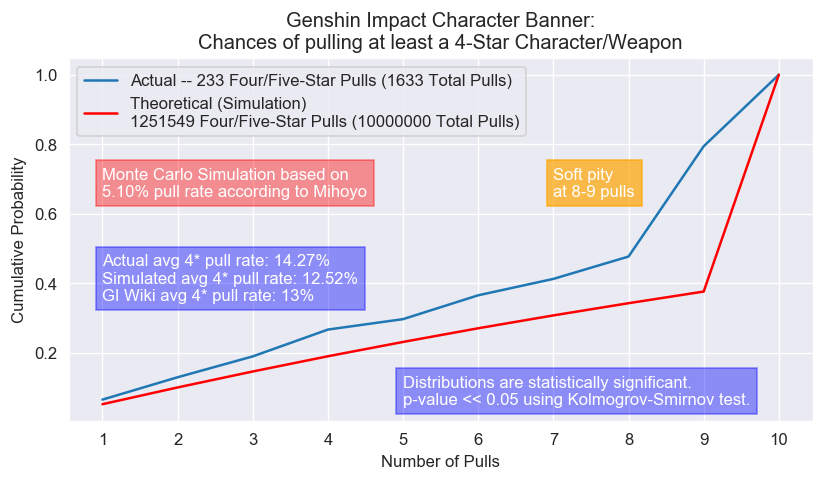

In [63]:

plt.figure(figsize=(8, 4), dpi=120)
plt.plot(true_cum_dist, label=f'Actual -- {df_character.shape[0]} Four/Five-Star Pulls ({df_character.pulls.sum()} Total Pulls)')
plt.plot(theoretical_cum_dist, label = f'Theoretical (Simulation) \n{char_4_star_pulls} Four/Five-Star Pulls ({n} Total Pulls)', c='red')
plt.xticks(range(1,11))
plt.xlabel('Number of Pulls')
plt.ylabel('Cumulative Probability')
plt.title('Genshin Impact Character Banner:\nChances of pulling at least a 4-Star Character/Weapon')
plt.legend()

t = plt.text(1,0.65, f'Monte Carlo Simulation based on \n{char_banner_rate:.2%} pull rate according to Mihoyo', c='white')
t.set_bbox(dict(facecolor='red', alpha=0.4, edgecolor='red'))

t = plt.text(5,0.05, f'Distributions are statistically significant.\np-value << 0.05 using Kolmogrov-Smirnov test.', c='white')
t.set_bbox(dict(facecolor='blue', alpha=0.4, edgecolor='blue'))

s = f'''Actual avg 4* pull rate: {char_actual_avg_rate:.2%}
Simulated avg 4* pull rate: {char_sim_avg_rate:.2%}
GI Wiki avg 4* pull rate: 13%'''
t = plt.text(1,0.35, s, c='white')
t.set_bbox(dict(facecolor='blue', alpha=0.4, edgecolor='blue'))

t = plt.text(7,0.65, f'Soft pity \nat 8-9 pulls', c='white')
t.set_bbox(dict(facecolor='orange', alpha=0.7, edgecolor='orange'))

plt.show()

## Statistical Testing

In [64]:
# dist_character

In [65]:
# dist_character_sim = df_character_simulation.set_index('pulls')
# dist_character_sim

Inspect the values of empirical data and simulation

In [66]:
df_character['pulls'].values[:5] # empirical data

array([ 6,  9, 10,  1,  4])

In [67]:
four_star_counter[:5] # simulation

[2, 8, 3, 7, 10]

Is the empirical data normally distributed?

In [68]:
stats.kstest(df_character['pulls'], 'norm')

KstestResult(statistic=0.9128721856483873, pvalue=2.3235965623590625e-247)

No. too low p-value.

Are the two distributions statistically the same?

In [69]:
stats.ks_2samp(df_character['pulls'], four_star_counter)

Ks_2sampResult(statistic=0.41842721546669664, pvalue=7.489446676928945e-36)

No.

Sanity check

KstestResult(statistic=0.05708720934598899, pvalue=0.9003457694502532)

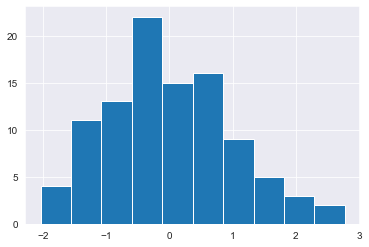

In [446]:
# np.random.seed()
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

plt.hist(s)
stats.kstest(s, 'norm')

In [222]:
stats.ks_2samp(df_character['pulls'], df_character['pulls'])

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [223]:
df_character.shape

(131, 2)

In [221]:
stats.ks_2samp(df_character['pulls']+1e-4, df_character['pulls'])

Ks_2sampResult(statistic=0.3053435114503817, pvalue=8.554676906301644e-06)

In [203]:
stats.ks_2samp(df_character['pulls']+np.random.random(df_character.shape[0])*0.001, df_character['pulls'])

Ks_2sampResult(statistic=0.3053435114503817, pvalue=8.554676906301644e-06)

In [194]:
stats.ks_2samp(df_character['pulls']+np.random.random(df_character.shape[0]), four_star_counter)

Ks_2sampResult(statistic=0.3974964575400815, pvalue=3.232571813282138e-18)